## Importing Packages , Functions  and classes 

In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

/Users/sumitkumarshukla/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/sumitkumarshukla/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## Get Data 

In [2]:
x = np.arange(10).reshape(-1,1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [3]:
x

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [4]:
y

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

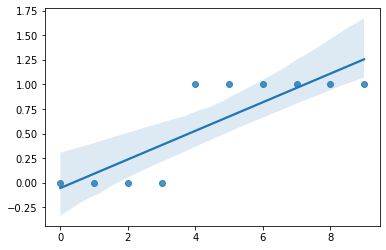

In [5]:
sns.regplot(x,y)

## Create a Model and Train it 

In [6]:
m = LogisticRegression(solver='liblinear', random_state=0)

In [7]:
m.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
m = LogisticRegression(solver='liblinear', random_state=0).fit(x,y)

In [9]:
m.classes_

array([0, 1])

In [10]:
m.intercept_

array([-1.04608067])

In [11]:
m.coef_

array([[0.51491375]])

## Evaluate the Model 

In [12]:
m.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [15]:
predictions = m.predict(x)

In [16]:
m.predict(x),y

(array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1]), array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1]))

In [21]:
m.score(x,y)* 100

90.0

In [22]:
confusion_matrix(y,predictions)

array([[3, 1],
       [0, 6]])

## Confusion Matrix 

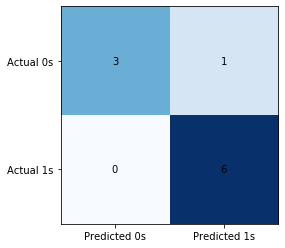

In [30]:
cm = confusion_matrix(y,predictions)
fig,ax = plt.subplots(figsize = (4,4))
ax.imshow(cm, cmap = 'Blues')
ax.xaxis.set(ticks  = (0,1), ticklabels = ('Predicted 0s' , 'Predicted 1s'))
ax.yaxis.set(ticks  = (0,1), ticklabels = ('Actual 0s'    , 'Actual 1s'))
ax.set_ylim(1.5,0-.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha = 'center', va = 'center' , color = 'black')
plt.show()

In [31]:
print(classification_report(y,predictions))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



In [32]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score = accuracy_score(y,predictions)

In [36]:
accuracy_score*100

90.0

## Improve your Model 

In [39]:
model = LogisticRegression(solver='liblinear', C = 10.0, random_state= 0)
model.fit(x,y)

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
model.intercept_

array([-3.51335372])

In [41]:
model.coef_

array([[1.12066084]])

In [42]:
model.predict_proba(x)

array([[0.97106534, 0.02893466],
       [0.9162684 , 0.0837316 ],
       [0.7810904 , 0.2189096 ],
       [0.53777071, 0.46222929],
       [0.27502212, 0.72497788],
       [0.11007743, 0.88992257],
       [0.03876835, 0.96123165],
       [0.01298011, 0.98701989],
       [0.0042697 , 0.9957303 ],
       [0.00139621, 0.99860379]])

In [43]:
pred = model.predict(x)

In [45]:
pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [46]:
model.score(x,pred)

1.0

In [48]:
confusion_matrix(y,pred)

array([[4, 0],
       [0, 6]])

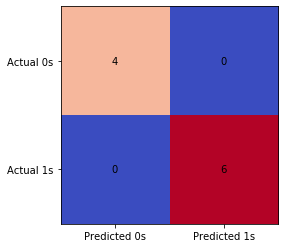

In [51]:
cm = confusion_matrix(y,pred)
fig,ax = plt.subplots(figsize = (4,4))
ax.imshow(cm, cmap = 'coolwarm')
ax.xaxis.set(ticks  = (0,1), ticklabels = ('Predicted 0s' , 'Predicted 1s'))
ax.yaxis.set(ticks  = (0,1), ticklabels = ('Actual 0s'    , 'Actual 1s'))
ax.set_ylim(1.5,0-.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha = 'center', va = 'center' , color = 'black')
plt.show()

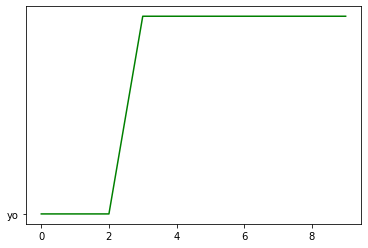

In [59]:
plt.plot(x,predictions,'g','yo')

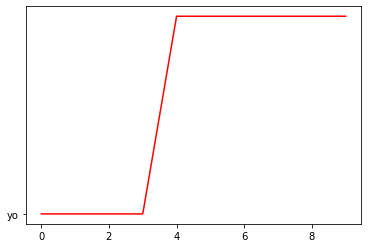

In [60]:
plt.plot( x,pred,'r','yo')

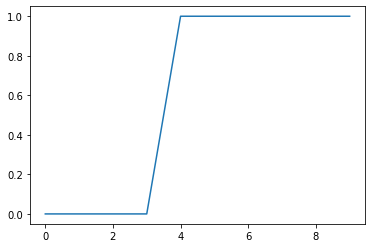

In [61]:
plt.plot(x,y)

# IRIS

In [62]:
iris = sns.load_dataset('iris')

In [63]:
import pandas as pd 

In [64]:
print(iris.head(30))

    sepal_length  sepal_width  petal_length  petal_width species
0            5.1          3.5           1.4          0.2  setosa
1            4.9          3.0           1.4          0.2  setosa
2            4.7          3.2           1.3          0.2  setosa
3            4.6          3.1           1.5          0.2  setosa
4            5.0          3.6           1.4          0.2  setosa
5            5.4          3.9           1.7          0.4  setosa
6            4.6          3.4           1.4          0.3  setosa
7            5.0          3.4           1.5          0.2  setosa
8            4.4          2.9           1.4          0.2  setosa
9            4.9          3.1           1.5          0.1  setosa
10           5.4          3.7           1.5          0.2  setosa
11           4.8          3.4           1.6          0.2  setosa
12           4.8          3.0           1.4          0.1  setosa
13           4.3          3.0           1.1          0.1  setosa
14           5.8         

In [66]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


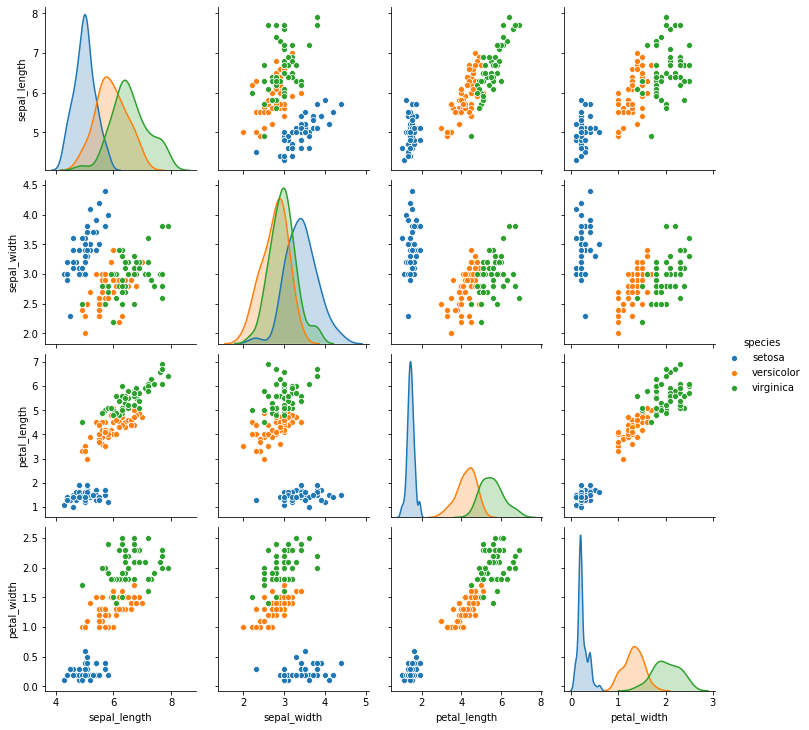

In [69]:
sns.pairplot(iris, hue = 'species')
plt.savefig('iris_pairplot.jpg')

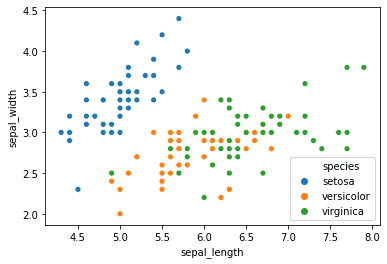

In [70]:
sns.scatterplot(x = 'sepal_length', y = 'sepal_width', hue = 'species', data = iris)

<Figure size 2880x2880 with 0 Axes>

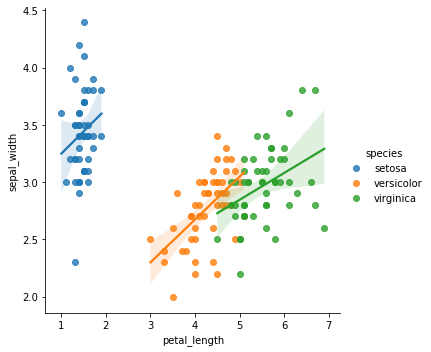

In [77]:
plt.figure(figsize=(40,40))
sns.lmplot(x = 'petal_length', y = 'sepal_width', hue = 'species', data = iris)

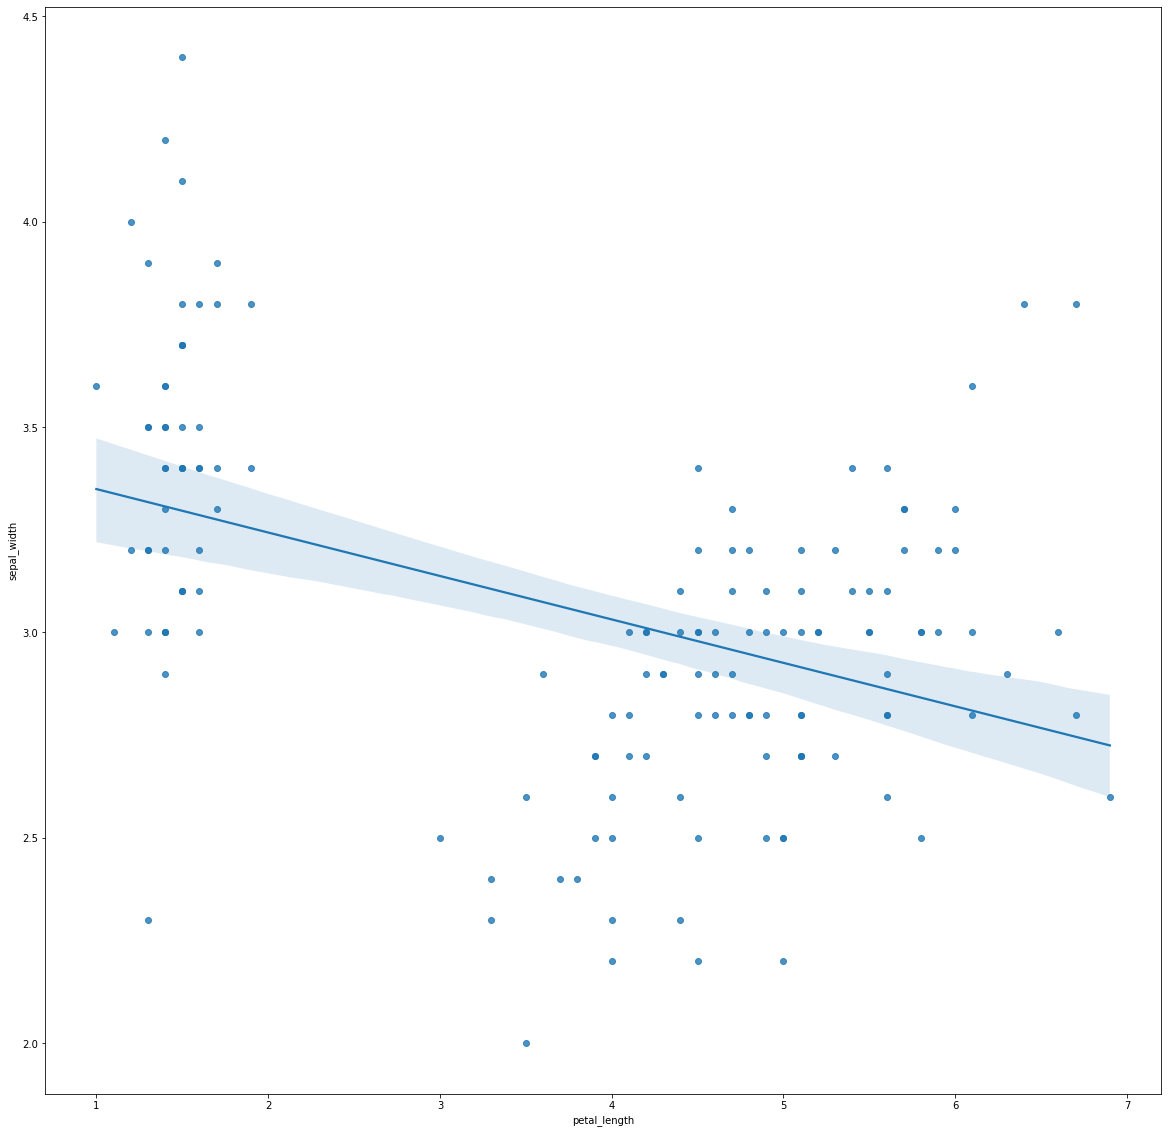

In [81]:
plt.figure(figsize=(20,20))
sns.regplot(x = 'petal_length', y = 'sepal_width', data = iris)

<Figure size 2880x2880 with 0 Axes>

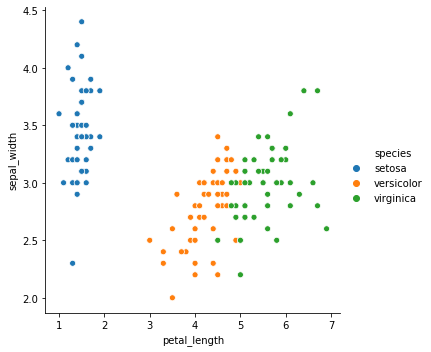

In [82]:
plt.figure(figsize=(40,40))
sns.relplot(x = 'petal_length', y = 'sepal_width', hue = 'species', data = iris)

In [85]:
iris.index

RangeIndex(start=0, stop=150, step=1)

In [86]:
iris.columns.to_list()

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [87]:
iris.shape

(150, 5)

In [88]:
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [89]:
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris['species']

In [90]:
from sklearn.linear_model import LogisticRegression

In [91]:
ir = LogisticRegression()

In [95]:
ir.fit(X,y)

/Users/sumitkumarshukla/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [97]:
from sklearn.metrics import classification_report

In [98]:
predicitons = ir.predict(X)

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica'

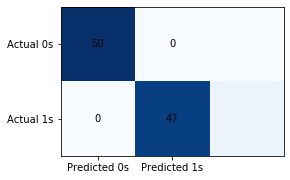

In [101]:
cm = confusion_matrix(y,predicitons)
fig,ax = plt.subplots(figsize = (4,4))
ax.imshow(cm, cmap = 'Blues')
ax.xaxis.set(ticks  = (0,1), ticklabels = ('Predicted 0s' , 'Predicted 1s'))
ax.yaxis.set(ticks  = (0,1), ticklabels = ('Actual 0s'    , 'Actual 1s'))
ax.set_ylim(1.5,0-.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha = 'center', va = 'center' , color = 'black')
plt.show()

In [102]:
ir.coef_

array([[-0.41814039,  0.9663378 , -2.52101577, -1.08409779],
       [ 0.53028079, -0.31442503, -0.19948841, -0.94813966],
       [-0.11214039, -0.65191277,  2.72050419,  2.03223745]])

In [103]:
ir.intercept_

array([  9.83777122,   2.21837936, -12.05615058])

In [104]:
ir.predict_proba(X)

array([[9.81796729e-01, 1.82032562e-02, 1.44268498e-08],
       [9.71724746e-01, 2.82752243e-02, 3.01656728e-08],
       [9.85443803e-01, 1.45561843e-02, 1.23261377e-08],
       [9.76282408e-01, 2.37175522e-02, 3.97222257e-08],
       [9.85380929e-01, 1.46190591e-02, 1.19449667e-08],
       [9.70456713e-01, 2.95432134e-02, 7.35302110e-08],
       [9.86878836e-01, 1.31211440e-02, 1.99796170e-08],
       [9.76394702e-01, 2.36052704e-02, 2.76313422e-08],
       [9.79830725e-01, 2.01692445e-02, 3.06869327e-08],
       [9.69129732e-01, 3.08702365e-02, 3.16495502e-08],
       [9.76506473e-01, 2.34935074e-02, 1.92207420e-08],
       [9.75395811e-01, 2.46041455e-02, 4.38545795e-08],
       [9.74556538e-01, 2.54434407e-02, 2.14855592e-08],
       [9.91967487e-01, 8.03250936e-03, 3.89476310e-09],
       [9.88209209e-01, 1.17907882e-02, 2.80771756e-09],
       [9.86771597e-01, 1.32283906e-02, 1.27909627e-08],
       [9.88115011e-01, 1.18849799e-02, 9.19923815e-09],
       [9.81552143e-01, 1.84478

In [122]:
predictions = ir.predict(X)

In [109]:
confusion_matrix(y,predicitons)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]])

In [111]:
ir.score(X,predicitons)

1.0

In [116]:
ir.predict([[9.4,4.6,5.0,1.5]])

array(['versicolor'], dtype=object)

In [118]:
ir.predict([[12.5,3.5,58.5,1.5]])

array(['virginica'], dtype=object)